# KNN Classifiers

### K Nearest Neighbors Classifiers

So far machine learning via probability (naive Bayes) and learning via errors (regression) have been covered (Modules 18 & 19).  In this module learning via similarity will be covered.  This means that you will look for the datapoints that are most similar to the observation you are trying to predict.  You'll start by looking at **Nearest Neighbor**. 

### Nearest Neighbor 

Using this example: classifying a song as either "rock" or "jazz".  For this data you have measures of duration in seconds and loudness in loudness units (decibels will not be used since it isn't a linear measure, which could create problems that will be covered later).

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import scipy 

from sklearn.neighbors import KNeighborsClassifier # New for this topic

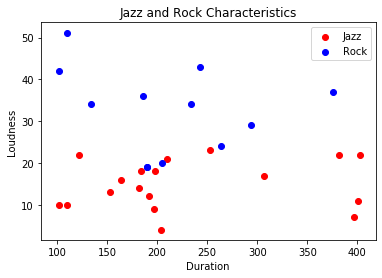

In [2]:
music = pd.DataFrame()

# Sample song durations, in seconds
music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]

# Sample loudness levels
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]

# We know whether the songs in our training data are jazz or not.
music['jazz'] = [ 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
                  0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
                  1, 1, 1, 1, 0, 0, 1, 1, 0, 0]

# Take a look at the data
plt.scatter(
    music[music["jazz"] == 1].duration, 
    music[music["jazz"] == 1].loudness, 
    color="red"
) 

plt.scatter(
    music[music["jazz"] == 0].duration, 
    music[music["jazz"] == 0].loudness, 
    color="blue"
)

plt.legend(["Jazz", "Rock"]) 
plt.title("Jazz and Rock Characteristics") 
plt.xlabel("Duration")
plt.ylabel("Loudness") 
plt.show();

The simplest form of a similarity model is the Nearest Neighbor model.  This works quite simply: when trying to predict an observation you find the closest (or _nearest_) known observation in your training data and use that value to make a prediction.  Here you'll use the model as a classifier, the outcome of interest will be a category.

To find which observation is "nearest" you need some kind of way to measure distance. Typically, you use _Euclidean distance_, the standard distance measure that you are familiar with from geometry.  With one observation in n-dimensions $(x_1, x_2, \dots, x_n)$ and the other ($w_1, w_2, \dots, w_n$) 
$$\sqrt{(x_1 - w_1)^2 + (x_2 - w_2)^2 + \dots + (x_n - w_n)^2}$$ 

You might recognize this formula, (taking distance, squaring them, adding the squares together and taking the root) as a generalization of the [Pythagorean theorem](https://en.wikipedia.org/wiki/Pythagorean_theorem) into n-dimensions.  You can technically define any distance measure you want, and there are times where this customization may be valuable.  As a general standard, however, you'll use Euclidean distance.  

Now that you have a distance measure from each point in the training data to the point, you're trying to predict the model can find the datapoint with the smallest distance and then apply that category to the prediction.  Try running the model using the `SKLearn` package.


In [11]:
neighbors = KNeighborsClassifier(n_neighbors=1) 
X = music[["loudness","duration"]]
Y = music.jazz 
neighbors.fit(X,Y)

# Predict for a song with 24 loutness that's 190 seconds long
prediction = neighbors.predict([[24,190]])

# Say whether it predicted jazz or not
print("Jazz") if prediction[0] else print("Not Jazz")

Not Jazz


It's as simple as that.  It looks like the model is predicting that the 24 loudness, 190 second long song is _not_ jazz.  All it takes to train the model is a dataframe of independent variables and a dataframe of dependent outcomes.

** \*Note** For this example, the `KNeighborClassifier` class from SKLearn was used.  This is because Nearest Neighbor is a simplification of K-Nearest Neighbors.  The jump, however, isn't that far.

### K-Nearest Neighbors

**K-Nearest Neighbors** (**KNN**) is the logical extension of Nearest Neighbor.  Instead of looking at just the single nearest datapoint to predict an outcome, you look at several of the nearest neighbors, with **_k_** representing the number of neighbors you choose to look at.  Each of the **_k_** neighbors gets to vote on what the predicted outcome should be.

This does a couple of valuable things.  First, it smooths out the predictions.  If only one neighbor gets to influence the outcome, the model explicitly overfits to the training data.  Any single outlier can create pockets of one category prediction surrounded by a sea of the other category.  

This also means that instead of just predicting classes, you get implicit probabilities.  If each of the **_k_** neighbors gets a vote on the outcome, then the probability of the test example being from any given class **_i_** is: 
$$\frac{votes_i}{k}$$

This applies for all classes present in the training set.  The example above only has two classes, but this model can accommodate as many classes as the dataset necessitates.  To come up with a classifier prediction it simply takes the class for which that fraction is maximized.

Now, expand the initial nearest neighbors model to a _KNN_ with a **_k_** of 5.


In [4]:
neighbors = KNeighborsClassifier(n_neighbors=5) 
X = music[["loudness","duration"]]
Y = music.jazz 
neighbors.fit(X,Y)

# Predict for a 24 loudness, 190 seconds long song
print(neighbors.predict([[24,190]]))
print(neighbors.predict_proba([[24,190]]))

[1]
[[0.4 0.6]]


Notice, that the test prediction has changed.  In using the five nearest neighbors it appears that there were two votes for rock and three for jazz, so it was classified as a jazz song.  This is different than the simpler Nearest Neighbors model.  While the closest observation was in fact rock, there are more jazz songs in the nearest **_k_** neighbors than rock.  

You can visualize the decision bounds with something called a _mesh_.  This allows you to generate a prediction over the whole space.  Read the code below and make sure you can pull out what the individual lines do.

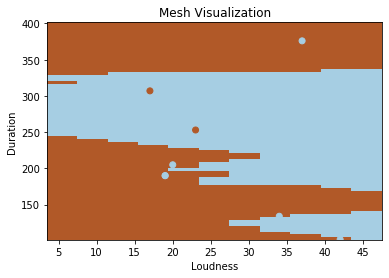

In [5]:
# Convert the data from dataframes to arrays for the mesh
X = np.array(X)
Y = np.array(Y)

# Mesh size 
h = 4.0

# To plot the decision boundary, you assign a color to each point in the mesh.
x_min = X[:, 0].min() - 0.5 
x_max = X[:, 0].max() + 0.5
y_min = X[:, 1].min() - 0.5
y_max = X[:, 1].max() + 0.5
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h), 
    np.arange(y_min, y_max, h)
)

Z = neighbors.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

plt.figure(1, figsize=(6,4)) 
plt.set_cmap(plt.cm.Paired) 
plt.pcolormesh(xx, yy, Z)

# Add the training points to the plot 
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel("Loudness") 
plt.ylabel("Duration")
plt.title("Mesh Visualization")

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show();

Looking at the visualization above, any new point that fell within a blue area will be predicted to be jazz, and any point that fell within a brown area will be predicted as rock.  The boundaries above are strangely jagged here, and that will be covered in the next notebook (20.03 Tuning KNN).

** \*Note** that the visualization isn’t completely continuous.  There are an infinite number of points in this space, and you can't calculate the value for each one.  That's where the mesh comes in, you've set the mesh size: (`h = 4.0`) to 4.0 and above, which means you calculate the value for each point in a grid where the points are spaces 4.0 away from each other.

You can make the mesh size smaller to get a more continuous visualization, but at the cost of a more computationally demanding calculation.  Below, recreate the plot above with a mesh size of `10.0`.  Then reduce the mesh size until you get a plot that looks good but still renders in a reasonable time.


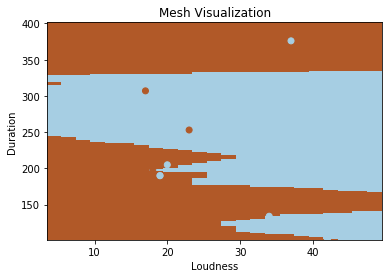

In [6]:
# Convert the data from dataframes to arrays for the mesh
X = np.array(X)
Y = np.array(Y)

# Mesh size 
h = 2.0

# To plot the decision boundary, you assign a color to each point in the mesh.
x_min = X[:, 0].min() - 0.5 
x_max = X[:, 0].max() + 0.5
y_min = X[:, 1].min() - 0.5
y_max = X[:, 1].max() + 0.5
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h), 
    np.arange(y_min, y_max, h)
)
                                                                                                                                                                                                                                                                                                                                                                                  
Z = neighbors.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

plt.figure(1, figsize=(6,4)) 
plt.set_cmap(plt.cm.Paired) 
plt.pcolormesh(xx, yy, Z)

# Add the training points to the plot 
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel("Loudness") 
plt.ylabel("Duration")
plt.title("Mesh Visualization")

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show();

## Challenge: Implement the Nearest Neighbor algorithm 

The Nearest Neighbor algorithm is extremely simple. So simple, in fact, that you should be able to build it yourself from scratch using the Python you already know. Code a Nearest Neighbors algorithm that works for two dimensional data. You can use either arrays or dataframes to do this. Test it against the SKLearn package on the music dataset from above to ensure that it's correct. The goal here is to confirm your understanding of the model and continue to practice your Python skills. We're just expecting a brute force method here. After doing this, look up "ball tree" methods to see a more performant algorithm design.

In [62]:
bidbook = pd.read_csv("Bid_Book_Spreadsheet_2017.csv")
# bidbook = bidbook.drop(bidbook[
#     (bidbook["Agency Number"]==55555) & 
#     (bidbook["Estimated Worth"]<1000) & 
#     (bidbook["Estimated Worth"]>100) &
#     (bidbook["Quantity"]<1000) & 
#     (bidbook["Quantity"]>100)].index)
bidbook[["Category","Quantity","Estimated Worth"]].dropna(inplace=True)
bidbook2 = bidbook[
    (~bidbook["Estimated Worth"].isnull()) & 
    (~bidbook["Quantity"].isnull()) & 
    (~bidbook["Category"].isnull()) &
    (bidbook["Agency Number"]!="55555") &
    (bidbook["Quantity"]<1000) & 
    (bidbook["Estimated Worth"]<1000)].copy() 
bidbook2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 19 to 1324
Data columns (total 17 columns):
Agency Number                              297 non-null object
Agency Name                                297 non-null object
Solicitation Number                        261 non-null object
Class Code                                 289 non-null object
Item Code                                  294 non-null object
Category                                   297 non-null object
Quantity                                   297 non-null float64
Unit of Sale (Each, Lot, Package, etc.)    297 non-null object
Description                                297 non-null object
Estimated Worth                            297 non-null float64
Contact Name                               297 non-null object
Contact Phone                              280 non-null object
Contact Email                              292 non-null object
Comments                                   64 non-null object
Specs and 

In [63]:
knn_model = pd.concat([bidbook2, pd.get_dummies(bidbook2["Category"], prefix="cat", drop_first=True)], axis=1)
knn_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 19 to 1324
Data columns (total 23 columns):
Agency Number                              297 non-null object
Agency Name                                297 non-null object
Solicitation Number                        261 non-null object
Class Code                                 289 non-null object
Item Code                                  294 non-null object
Category                                   297 non-null object
Quantity                                   297 non-null float64
Unit of Sale (Each, Lot, Package, etc.)    297 non-null object
Description                                297 non-null object
Estimated Worth                            297 non-null float64
Contact Name                               297 non-null object
Contact Phone                              280 non-null object
Contact Email                              292 non-null object
Comments                                   64 non-null object
Specs and 

In [64]:
# Agency of Interest = 529 (Health and Human Services Commission)

# Agency Count
print(f"Category Count: {len(knn_model['Category'].unique())}")

# Percent Health and Human Services
print(f"Percent Office Supplies: {len(knn_model[(knn_model['cat_Office Supplies']==1)])/len(knn_model['cat_Office Supplies'])}")

Category Count: 7
Percent Office Supplies: 0.39057239057239057


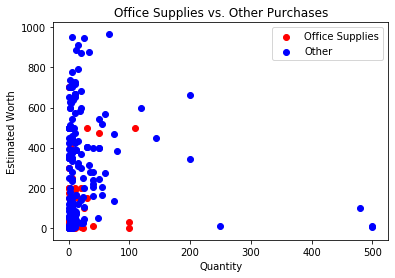

In [66]:
plt.scatter(
    knn_model[knn_model["cat_Office Supplies"]==1]["Quantity"],
    knn_model[knn_model["cat_Office Supplies"]==1]["Estimated Worth"],
    color="red"
)

plt.scatter(
    knn_model[knn_model["cat_Office Supplies"]==0]["Quantity"],
    knn_model[knn_model["cat_Office Supplies"]==0]["Estimated Worth"],
    color="blue"
)

plt.legend(["Office Supplies","Other"])
plt.title("Office Supplies vs. Other Purchases")
plt.xlabel("Quantity")
plt.ylabel("Estimated Worth")
plt.show()

In [94]:
neighbors = KNeighborsClassifier(n_neighbors=5) 
X = knn_model[["Quantity","Estimated Worth"]] # Feature set
Y = knn_model["cat_Office Supplies"] # Target variable

neighbors.fit(X,Y)

# Make predictions for params = [Quantity, Estimated Worth]
params = [10,8]

# What does the model say the parameters is?
prediction = neighbors.predict([params])

# What are the probabilities the model is right?
probability = neighbors.predict_proba([params])

# Output the predicion and probabilities
print("The model thinks the item is: ", end="")
print("Office Supplies") if prediction[0] else print("Other")
print(f"Probability of Other: {probability.item(0)*100:.2f}%; Probability of Office Supplies: {probability.item(1)*100:.2f}%")

The model thinks the item is: Office Supplies
Probability of Other: 20.00%; Probability of Office Supplies: 80.00%


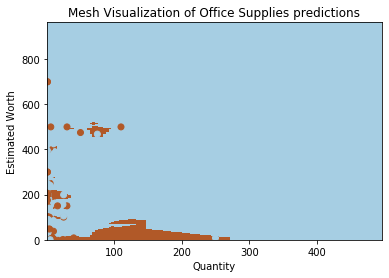

In [111]:
# Convert X & Y from dataframes to arrays
X = np.array(X) # Feature set
Y = np.array(Y) # Target variable

# Mesh size
h = 4.0

# Plot the decision boundry, assigning a color to each point in the mesh
x_min = X[:, 0].min() - 0.5 # From array X, subtract 0.5 from the minimum value of element 0 (Quantity)
x_max = X[:, 0].max() + 0.5 # From array X, add 0.5 to the maximum value of element 0 (Quantity)
y_min = X[:, 1].min() - 0.5 # From array X, subtract 0.5 from the minimum value of element 1 (Estimated Worth)
y_max = X[:, 1].max() + 0.5 # From array X, add 0.5 to the maximum value of element 1 (Estimated Worth)

# meshgrid(x1,x2,..., xn, indexing, sparse, copy,) x_i are 1d arrays 
xx,yy = np.meshgrid(
    np.arange(x_min, x_max, h), # arange(start, stop, step)
    np.arange(y_min, y_max, h)
) # This returns a 2d array which is split by dimension between xx & yy

# Assign an array to Z that consists of the concatenated xx & yy arrays that have been flattened by .ravel() 
# This array assigns inputs (Quantity [xx], Estimated Worth [yy]) to the model for prediction
Z = neighbors.predict(np.c_[xx.ravel(), yy.ravel()]) # An array of binary predictions: 0 = Other, 1 = Office Supplies

# Put the results into a color plot
Z = Z.reshape(xx.shape) # shape the predictions to the dimensions of the xx array

plt.figure(1, figsize=(6,4))
plt.set_cmap(plt.cm.Paired) # Declare a colormap
plt.pcolormesh(xx,yy,Z) 

# Add the training points to the plot
plt.scatter(X[:,0], X[:, 1], c=Y)
plt.xlabel("Quantity")
plt.ylabel("Estimated Worth")
plt.title("Mesh Visualization of Office Supplies predictions")

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show();

- [Ball Tree Overview on Github](https://github.com/JKnighten/k-nearest-neighbors/wiki/KNN-and-BallTree-Overview)